In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer ,OrdinalEncoder ,LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/drug200.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
# balanced dataset or not ?
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

not balanced dataset -> use stratified dataset splitter

In [ ]:
cat_vars = ['Sex','BP','Cholesterol']

In [ ]:
for var in cat_vars:
  print(df[var].nunique())
  print(df[var].unique())

2
['F' 'M']
3
['HIGH' 'LOW' 'NORMAL']
2
['HIGH' 'NORMAL']


In [ ]:
df =df.dropna()

In [ ]:
df1 = df.copy()

In [ ]:
# feature encoding
ohc = OneHotEncoder(drop = 'first' ) # drop one feature to avoid multicollinearity
oe = OrdinalEncoder(categories=[['LOW','NORMAL','HIGH'],['Normal','High']] )                 #

In [ ]:
for var in cat_vars:
  x = ohc.fit_transform(df1[[var]])   # x is sparse matrix
  cats = ohc.categories_[0]
  cats = np.delete(cats,0)
  new_cols = ['_'.join([var,cat]) for cat in cats]
  df_temp = pd.DataFrame(x.toarray(), columns = new_cols)
  df1 = pd.concat([df1,df_temp] ,axis =1)
  df1 = df1.drop(columns = var)

In [ ]:
df1

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0.0,0.0,0.0,0.0
1,47,13.093,drugC,1.0,1.0,0.0,0.0
2,47,10.114,drugC,1.0,1.0,0.0,0.0
3,28,7.798,drugX,0.0,0.0,1.0,0.0
4,61,18.043,DrugY,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0.0,1.0,0.0,0.0
196,16,12.006,drugC,1.0,1.0,0.0,0.0
197,52,9.894,drugX,1.0,0.0,1.0,0.0
198,23,14.020,drugX,1.0,0.0,1.0,1.0


In [ ]:
cat_vars.remove('Sex')
for var in cat_vars:
  print(var)

BP
Cholesterol


In [ ]:
BP_ord = ['LOW','NORMAL','HIGH']
ch_ord= ['NORMAL' ,'HIGH']
oe1 = OrdinalEncoder(categories =[BP_ord , ch_ord])
d = oe1.fit_transform(df[['BP','Cholesterol']])
d  = pd.DataFrame(d, columns=['BP_code','Cholesterol_code'])
df = pd.concat([d,df] ,axis =1)
df.drop(columns =['BP' , 'Cholesterol'] ,inplace =True)


In [ ]:
df

,BP_code,Cholesterol_code,Age,Sex,Na_to_K,Drug
0,2.0,1.0,23,F,25.355,DrugY
1,0.0,1.0,47,M,13.093,drugC
2,0.0,1.0,47,M,10.114,drugC
3,1.0,1.0,28,F,7.798,drugX
4,0.0,1.0,61,F,18.043,DrugY
...,...,...,...,...,...,...
195,0.0,1.0,56,F,11.567,drugC
196,0.0,1.0,16,M,12.006,drugC
197,1.0,1.0,52,M,9.894,drugX
198,1.0,0.0,23,M,14.020,drugX


In [ ]:
lb = LabelBinarizer()
df['sex'] = lb.fit_transform(df['Sex'])

In [ ]:
df.drop(columns=['Sex'],inplace =True)

In [ ]:
df

,BP_code,Cholesterol_code,Age,Na_to_K,Drug,sex
0,2.0,1.0,23,25.355,DrugY,0
1,0.0,1.0,47,13.093,drugC,1
2,0.0,1.0,47,10.114,drugC,1
3,1.0,1.0,28,7.798,drugX,0
4,0.0,1.0,61,18.043,DrugY,0
...,...,...,...,...,...,...
195,0.0,1.0,56,11.567,drugC,0
196,0.0,1.0,16,12.006,drugC,1
197,1.0,1.0,52,9.894,drugX,1
198,1.0,0.0,23,14.020,drugX,1


## label encoding

In [ ]:
le = LabelEncoder()
df['Drug1'] = le.fit_transform(df['Drug'])

In [ ]:
df.head()

,BP_code,Cholesterol_code,Age,Na_to_K,Drug,sex,Drug1
0,2.0,1.0,23,25.355,DrugY,0,0
1,0.0,1.0,47,13.093,drugC,1,3
2,0.0,1.0,47,10.114,drugC,1,3
3,1.0,1.0,28,7.798,drugX,0,4
4,0.0,1.0,61,18.043,DrugY,0,0


In [ ]:
df= df.drop(columns=['Drug'])

In [ ]:
# set X,y
y = df['Drug1']
X = df.drop(columns= ['Drug1'])
# stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2,  random_state=122)
train_idx,test_idx = next(sss.split(X,y))

In [ ]:
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]
X_test = X.iloc[test_idx]
y_test= y.iloc[test_idx]

# fit logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear',penalty = 'l2' ,C=1).fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
# l1 penalty - LogisitcRegressionCV does logistic regression cross validation
# cv is stratified cross validation by default and number of validations is 4
# Cs is the regularization parameter , you can use list or number # if used number in Cs so it menas taking number of logarithmic
lr_l1 = LogisticRegressionCV(solver='liblinear',penalty = 'l1' , cv = 4 ,Cs=10).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [ ]:
 #LogisitcRegressionCV does logistic regression cross validation
lr_l2 = LogisticRegressionCV(solver='liblinear',penalty = 'l2' , Cs = 10 ,cv =4).fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_l1 = lr_l1.predict(X_test)
y_pred_l2 = lr_l2.predict(X_test)

In [ ]:
y_pred_lr_t = y_pred_lr.reshape((40,1))
y_pred_l1_t = y_pred_l1.reshape((40,1))
y_pred_l2_t = y_pred_l2.reshape((40,1))

In [ ]:
d = {'true':y_test,'lr': y_pred_lr, 'lr_l1': y_pred_l1 , 'lr_l2':y_pred_l2}
results = pd.DataFrame(data=d)

In [ ]:
results.head()

,true,lr,lr_l1,lr_l2
89,0,0,0,0
26,0,0,0,0
115,0,0,0,0
30,4,4,4,4
37,4,0,4,4


In [ ]:
y_pred_lr_proba = lr.predict_proba(X_test)
y_pred_l1_proba = lr_l1.predict_proba(X_test)
y_pred_l2_proba = lr_l2.predict_proba(X_test)

In [ ]:
probas = [y_pred_lr_proba ,y_pred_l1_proba, y_pred_l2_proba]
models = ['lr','lr_l1','lr_l2']
df = pd.DataFrame()
for p,m in zip(probas,models):
  c= pd.MultiIndex(levels=[[m],['DrugA','DrugB','DrugC','DrugD','DrugE']], codes=[[0,0,0,0,0],[0,1,2,3,4]])
  df_temp = pd.DataFrame(data = p ,columns=c)
  df = pd.concat([df,df_temp],axis =1)

In [ ]:
df

lr                                                     lr_l1  \
       DrugA         DrugB         DrugC     DrugD     DrugE     DrugA   
0   0.776268  1.280030e-03  6.846962e-03  0.002196  0.213409  0.861576   
1   0.996948  1.263453e-03  1.697303e-05  0.000055  0.001717  0.999886   
2   0.875936  5.476833e-02  1.789573e-02  0.001817  0.049583  0.987231   
3   0.158089  2.418606e-01  5.027041e-02  0.019139  0.530642  0.000065   
4   0.539630  5.388875e-04  1.470589e-03  0.046590  0.411771  0.365215   
5   0.791957  1.805338e-05  3.418150e-04  0.011256  0.196427  0.890214   
6   0.058601  1.920112e-01  1.106765e-01  0.024694  0.614018  0.000017   
7   0.836267  6.346546e-03  4.142187e-03  0.025226  0.128019  0.920975   
8   0.905916  2.641601e-02  1.931962e-02  0.001520  0.046828  0.984733   
9   0.755164  2.404992e-03  1.456548e-02  0.034679  0.193187  0.956786   
10  0.273916  4.638131e-01  1.162723e-01  0.006470  0.139528  0.043212   
11  0.944291  2.205490e-04  2.812398e-04  0.000450  0.054757  0.976680   
12  0.051957  2.335473e-02  8.756851e-03  0.505131  0.410800  0.000004   
13  0.933500  7.310370e-03  3.988874e-04  0.012074  0.046718  0.979282   
14  0.209695  1.473331e-01  4.086986e-01  0.007599  0.226675  0.063836   
15  0.029791  6.431353e-01  1.631856e-01  0.013657  0.150231  0.000012   
16  0.810731  2.585729e-03  3.550042e-03  0.002106  0.181027  0.858040   
17  0.139464  2.146001e-04  2.714773e-02  0.097076  0.736098  0.006975   
18  0.027272  9.151720e-04  1.259345e-01  0.180239  0.665640  0.000005   
19  0.390932  2.879189e-05  1.206199e-02  0.040956  0.556021  0.444853   
20  0.991491  1.175562e-07  2.842160e-07  0.000275  0.008234  0.999232   
21  0.007954  4.381650e-01  3.628739e-01  0.012851  0.178156  0.000003   
22  0.968480  6.640991e-06  1.901208e-04  0.000151  0.031173  0.995169   
23  0.029998  1.010379e-01  5.386058e-01  0.000937  0.329421  0.000229   
24  0.716390  4.134553e-03  8.882707e-03  0.003706  0.266886  0.860653   
25  0.041196  2.008986e-01  1.464619e-01  0.178214  0.433229  0.000007   
26  0.868923  6.843436e-02  5.273477e-03  0.000128  0.057242  0.958840   
27  0.085207  6.210182e-02  1.504295e-01  0.169647  0.532614  0.000939   
28  0.073511  3.341978e-03  2.574283e-02  0.174269  0.723135  0.000039   
29  0.998275  1.296096e-05  1.351458e-05  0.000002  0.001697  0.999950   
30  0.092955  1.805828e-03  1.093670e-02  0.468161  0.426142  0.000381   
31  0.991836  3.622072e-03  2.686389e-05  0.000010  0.004505  0.999353   
32  0.167948  6.288745e-01  7.813027e-02  0.007238  0.117809  0.002520   
33  0.305374  2.342697e-01  2.540893e-01  0.008007  0.198260  0.409770   
34  0.147129  3.640060e-04  1.659526e-02  0.395841  0.440071  0.003470   
35  0.103637  2.718041e-01  6.448673e-02  0.160182  0.399890  0.000053   
36  0.293423  4.302118e-01  1.250150e-01  0.006480  0.144871  0.065758   
37  0.909302  7.714266e-06  4.789929e-05  0.039215  0.051428  0.986669   
38  0.840962  9.706551e-02  4.816919e-03  0.000136  0.057019  0.944772   
39  0.293634  9.261246e-04  8.892212e-03  0.089662  0.606886  0.005367   

                                                               lr_l2  \
           DrugB         DrugC         DrugD     DrugE         DrugA   
0   6.550005e-08  2.164543e-06  8.944726e-17  0.138422  8.395888e-01   
1   1.816180e-07  3.412808e-08  8.722539e-24  0.000114  9.993942e-01   
2   1.203040e-03  3.199681e-03  1.095360e-16  0.008366  9.633771e-01   
3   7.885125e-02  6.508992e-07  1.196214e-09  0.921083  7.006809e-12   
4   2.405984e-09  2.164760e-11  1.668453e-07  0.634785  2.778447e-01   
5   4.576931e-13  2.634353e-11  6.826441e-12  0.109786  8.512430e-01   
6   2.134912e-02  5.698775e-06  9.658855e-10  0.978629  3.345114e-13   
7   4.379117e-06  1.867568e-07  1.452594e-08  0.079021  9.080707e-01   
8   1.859317e-04  8.775038e-03  1.847398e-17  0.006306  9.712232e-01   
9   1.081569e-07  6.055028e-06  1.369891e-09  0.043208  9.301750e-01   
10  8.069811e-01  2.640658e-02  2.371

## K nearest neighbour algorithm
All the feature preprocessing were done for the logistic regression model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
y_pred_knn

array([4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 2, 4, 0, 2, 4, 0, 0, 1,
       0, 4, 4, 1, 0, 2, 4, 0, 3, 0, 4, 2, 2, 4, 1, 0, 0, 4])

In [ ]:
from sklearn.metrics import   precision_score , f1_score , roc_auc_score ,classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
a = []
k_list =[]
for k in range(3,20):
  knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
  y_pred_knn = knn.predict(X_test)
  a.append(accuracy_score(y_test , y_pred_knn))
  k_list.append(k)

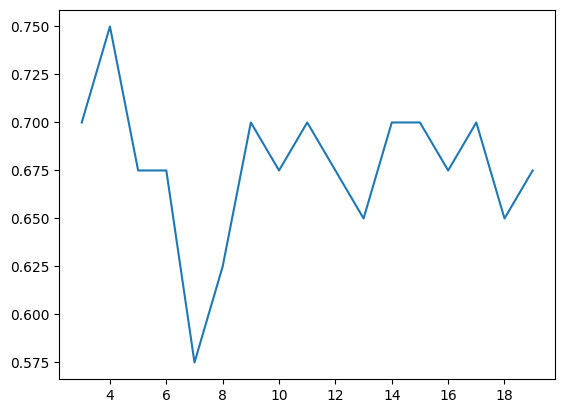

In [ ]:
plt.plot(k_list,a)

The best value of *k* is 4 as it achieves the highest accuracy

We will try the cross validation to determine also the value of *k*

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
estimator = Pipeline([('knn',KNeighborsClassifier())])
k = np.arange(3 ,40 ,1)
grid = {'knn__n_neighbors':k}
g = GridSearchCV(estimator , param_grid =grid , scoring = 'accuracy',cv= skf,error_score='raise')

In [ ]:
k

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])

In [ ]:
g.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])},
             scoring='accuracy')

In [ ]:
g.best_estimator_

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=6))])

In [ ]:
g.best_score_

0.6625

In [ ]:
t = confusion_matrix(y_pred_knn , y_test)
pd.DataFrame(t)

,0,1,2,3,4
0,16,0,0,0,2
1,0,2,0,0,1
2,0,0,2,1,2
3,0,0,0,1,0
4,2,3,1,1,6


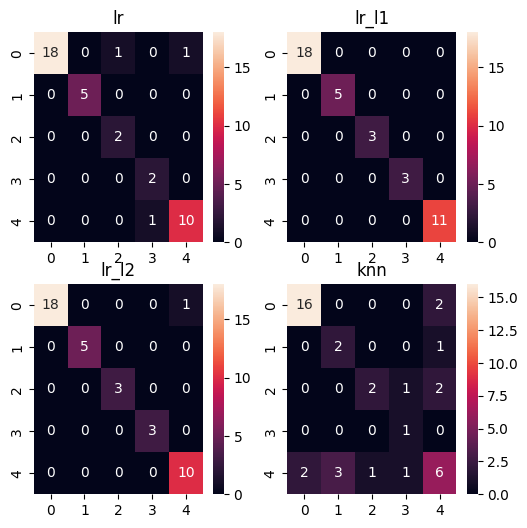

In [ ]:
fig , ax = plt.subplots(2,2);
axes = ax.flatten();
fig.set_size_inches(6,6)
preds =[y_pred_lr,y_pred_l1,y_pred_l2,y_pred_knn]
models = ['lr','lr_l1','lr_l2','knn']
#ax1 = sb.heatmap(confusion_matrix(y_pred_knn , y_test),annot =True)
confusion_matrix(preds[0],y_test)
for ax,p,mod in zip(axes,preds,models):
  d = pd.DataFrame(confusion_matrix(p,y_test))
  d
  sb.heatmap(d, ax=ax,annot=True)
  ax.set_title(mod)

In [ ]:
preds =[y_pred_lr,y_pred_l1,y_pred_l2,y_pred_knn]
models = ['lr','lr_l1','lr_l2','knn']
for p,m in zip(preds,models):
  print('Classification report of model --->>> ',m)
  print(classification_report(p , y_test))

Classification report of model --->>>  lr
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       1.00      1.00      1.00         5
           2       0.67      1.00      0.80         2
           3       0.67      1.00      0.80         2
           4       0.91      0.91      0.91        11

    accuracy                           0.93        40
   macro avg       0.85      0.96      0.89        40
weighted avg       0.94      0.93      0.93        40

Classification report of model --->>>  lr_l1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00 

The classification report gives a detailed report about the four metrics (precision , recall ,f1_score ,support) for each class individually. Then, it gave a weighted average for each metric as a sigle number so you can look at one individual number and compare the models easily.

We try now to use averaged reults and put them in one tidy dataframe to compare them

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
preds =[y_pred_lr,y_pred_l1,y_pred_l2,y_pred_knn]
models = ['lr','lr_l1','lr_l2','knn']
metrics = pd.DataFrame()
for p,m in zip(preds,models):
  s = score(p , y_test , average = 'weighted')
  s = pd.Series(data = s , name = m)
  metrics = pd.concat([metrics , s],axis =1)
    #metrics = pd.concat([metrics ,s])

In [ ]:
metrics

,lr,lr_l1,lr_l2,knn
0,0.941667,1.0,0.977273,0.698939
1,0.925000,1.0,0.975000,0.675000
2,0.928684,1.0,0.975257,0.675000
3,NaN,NaN,NaN,NaN


In [ ]:
roc_auc_score(y_test , y_pred_lr ,multi_class ='ovr')

AxisError: ignored